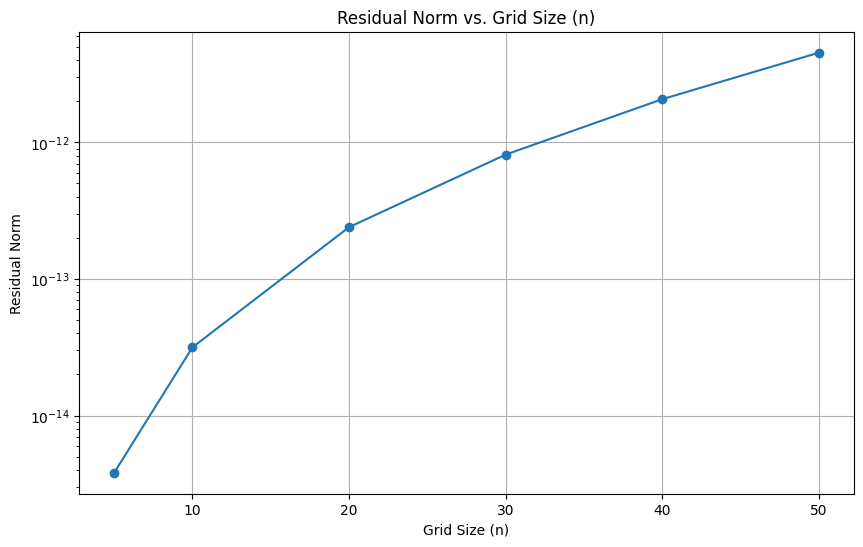

In [4]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

def direct_solver(A, b):
    x = np.linalg.solve(A, b)
    return x

def generate_laplacian_2d(n, a=1):
    h = 1.0 / (n + 1)  # Grid spacing
    k = a / h**2  # Scaling factor
    I = np.eye(n)  # Identity matrix of size n
    T = np.diag(4*np.ones(n)) + np.diag(-1*np.ones(n-1), 1) + np.diag(-1*np.ones(n-1), -1)  # 1D Laplacian
    A = sp.kron(I, T) + sp.kron(np.diag(-1*np.ones(n-1), 1), I) + sp.kron(np.diag(-1*np.ones(n-1), -1), I)  # 2D Laplacian

    return k * A

def compute_residual(A, x, b):
    r = b - A @ x
    return r

# Example usage
n_values = [5, 10, 20, 30, 40, 50]  # Different grid sizes
residuals = []

for n in n_values:
    laplacian_matrix = generate_laplacian_2d(n).toarray()  # Convert to dense array for display
    x = direct_solver(laplacian_matrix, np.ones(n**2))  # Solve for x
    residual = compute_residual(laplacian_matrix, x, np.ones(n**2))  # Compute residual
    residuals.append(np.linalg.norm(residual)) #append the norm of the residual.

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(n_values, residuals, marker='o')
plt.xlabel('Grid Size (n)')
plt.ylabel('Residual Norm')
plt.title('Residual Norm vs. Grid Size (n)')
plt.grid(True)
plt.yscale('log') #use log scale for better visualization.
plt.show()

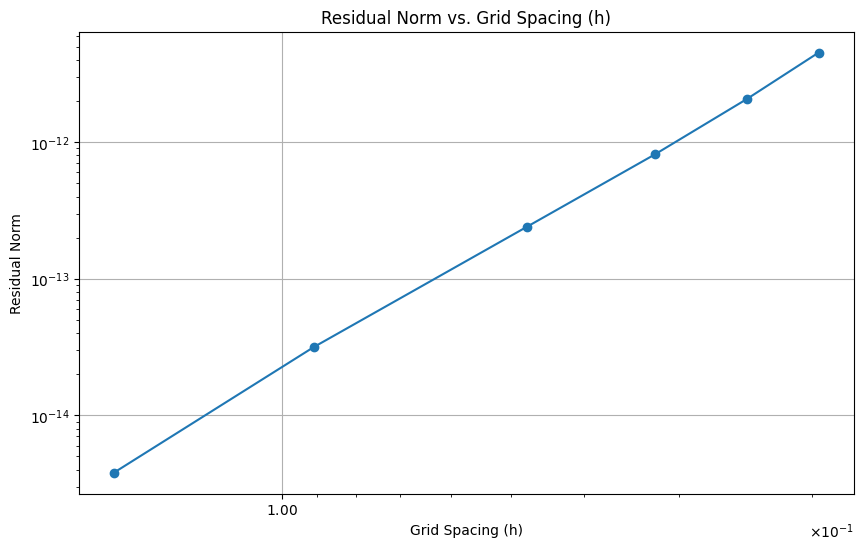

In [5]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # Import the ticker module

def direct_solver(A, b):
    x = np.linalg.solve(A, b)
    return x

def generate_laplacian_2d(n, a=1):
    h = 1.0 / (n + 1)  # Grid spacing
    k = a / h**2  # Scaling factor
    I = np.eye(n)  # Identity matrix of size n
    T = np.diag(4*np.ones(n)) + np.diag(-1*np.ones(n-1), 1) + np.diag(-1*np.ones(n-1), -1)  # 1D Laplacian
    A = sp.kron(I, T) + sp.kron(np.diag(-1*np.ones(n-1), 1), I) + sp.kron(np.diag(-1*np.ones(n-1), -1), I)  # 2D Laplacian

    return k * A

def compute_residual(A, x, b):
    r = b - A @ x
    return r

# Example usage
n_values = [5, 10, 20, 30, 40, 50]  # Different grid sizes
residuals = []
h_values = []

for n in n_values:
    h = 1.0 / (n + 1)
    laplacian_matrix = generate_laplacian_2d(n).toarray()  # Convert to dense array for display
    x = direct_solver(laplacian_matrix, np.ones(n**2))  # Solve for x
    residual = compute_residual(laplacian_matrix, x, np.ones(n**2))  # Compute residual
    residuals.append(np.linalg.norm(residual)) #append the norm of the residual.
    h_values.append(h)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(h_values, residuals, marker='o')
plt.xlabel('Grid Spacing (h)')
plt.ylabel('Residual Norm')
plt.title('Residual Norm vs. Grid Spacing (h)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis() #inverting the x axis so that h goes from big to small.

# Format the x-axis labels in scientific notation
ax = plt.gca()  # Get the current axes
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.show()